<a href="https://colab.research.google.com/github/dmuman/ML-projects-and-tutorials/blob/main/Pandas/Tutorials/pandas_tutorial_ukr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Про Pandas

Бібліотека `pandas` надає доступ до швидких та простих у використанні структур даних та інструментів аналізу даних. Головна структура даних - це `DataFrame`, про яку можна думати як про двовимірну (2D) таблицю в пам'яті (in-memory 2D table), схоже на таблицю Excel, з іменами колонок та підписами (labels) рядків. Багато функцій, які є в Excel, можна реалізувати і програмно, кодом. Наприклад, для створення зведених таблиць (pivot tables), обчислювання стовпців на основі інших стовпців, побудови графіків тощо. Також можна групувати рядки за значеннями стовпців або об'єднувати таблиці, як в SQL. Pandas також чудово працює з часовими рядами (time series).

# Налаштування

Для початку `pandas` треба імпортувати. Зазвичай, його імпортують як `pd`:

In [ ]:
import pandas as pd

# Об'єкти `Series`

Бібліотека pandas містить наступні корисні структури даних:
* об'єкти `Series`. Це одновимірні (1D) масиви, схожі до колонок в електронних таблицях (spreadsheet, з іменем колонки та лейблами рядків).
* об'єкти `DataFrame`. Це двовимірні (2D) таблиці, схожі на електронні таблиці (spreadsheet, з іменами колонок та лейблами рядків).
* об'єкти `Panel`. Про `Panel` можна думати, як про словник (dictionary) `DataFrame`ів. Вони використовуються не дуже часто.

## Створення `Series`

Почнімо зі створення нашого першого об'єкту `Series`

In [ ]:
s = pd.Series([2, -1, 3, 5])
s

,0
0,2
1,-1
2,3
3,5


## Схожість з одновимірним `ndarray`

Об'єкти `Series` ведуть себе дуже схоже до одновимірних масивів з NumPy - `ndarray`. Їх навіть можна надавати як параметри для функцій NumPy.

In [ ]:
import numpy as np
np.exp(s)

,0
0,7.389056
1,0.367879
2,20.085537
3,148.413159


Проведення арифметичних операцій над `Series` також можливі, і виконуються вони поелементно, як і над `ndarray`:

In [ ]:
s + [1000, 2000, 3000, 4000]

,0
0,1002
1,1999
2,3003
3,4005


Схоже до NumPy, якщо додати лише одне число до `Series`, це число буде додано до всіх елементів в `Series`. Це називається **бродкастином (broadcasting)**:

In [ ]:
s + 1000

,0
0,1002
1,999
2,1003
3,1005


Це також справджується і для всіх бінарних операцій, як от `*` або `/`, а також і для умовних операцій:

In [ ]:
s < 0

,0
0,False
1,True
2,False
3,False


## Індексні позначки (index labels)

Кожен елемент в об'єкті `Series` має свій унікальний ідентифікатор, який називається *індексною позначкою (index label)*. За замовчуванням, це просто ранг елементу в `Series` (починаючи з `0`), але індекти можна зробити і вручну:

In [ ]:
s2 = pd.Series([68, 83, 112, 68], index=['alice', 'bob', 'charles', 'darwin'])
s2

,0
alice,68
bob,83
charles,112
darwin,68


Завдяки цьому, `Series` можна використовувати так само, як і `dict`:

In [ ]:
s2['bob']

83

Щоб було зрозуміліше, коли ти отримуєш доступ по *label* або по *integer location*, рекомендовано завжди використовувати атрибут `loc` коли по `label` та `iloc`, якщо по *integer location*

In [ ]:
s2.loc['bob']

83

In [ ]:
s2.iloc[1]

83

Розділення (slicing) `Series` також ділить і index labels:

In [ ]:
s2.iloc[1:3]

,0
bob,83
charles,112


Це може призвести до неочікуваних результатів, якщо використовуються нумеровані лейбли (numeric labels) за замовчуванням, тому треба бути обережним:

In [ ]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

,0
0,1000
1,1001
2,1002
3,1003


In [ ]:
surprise_slice = surprise[2:]
surprise_slice

,0
2,1002
3,1003


Що ми маємо. Перший елемент має індекс `2`. Елементу з індексом `0` немає в розрізі (slice).

In [ ]:
try:
  surprise_slice[0]
except KeyError as e:
  print("Key error:", e)

Key error: 0


Але варто запам'ятати, що отримати доступ до елементів по *integer location* можна за допомогою атрибуту `iloc`. Це демонструє ще одну причину, чому завжди краще користуватись `loc` та `iloc` для доступу в об'єкті `Series`:

In [ ]:
surprise_slice.iloc[0]

1002

## Ініціалізація зі словника (init from `dict`)

Об'єкт `Series` можна створити з `dict`. Ключі будуть використані як *index labels*:

In [ ]:
weights = {'alice': 68, 'bob': 83, 'colin': 86, 'darwin': 68}
s3 = pd.Series(weights)
s3

,0
alice,68
bob,83
colin,86
darwin,68


Можна контролювати, який елемент хочеться додати в `Series`, а також в якому порядку, явно (explicitly) специфікуючи бажаний `index`:

In [ ]:
s4 = pd.Series(weights, index = ['colin', 'alice'])
s4

,0
colin,86
alice,68


## Автоматичне вирівнювання (automatic alignment)

Коли операція включає в себе декілька об'єктів `Series`, `pandas` автоматично вирівнює (aligns) елементи, зіставляючи (by matching) index labels.

In [ ]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


,0
alice,136.0
bob,166.0
charles,NaN
colin,NaN
darwin,136.0


`Series`, яка вийшла в результаті, містить в собі об'єднання (union) з index labels з `s2` та `s3`. Оскільки `"colin"` немає в `s2` і `"charles"` немає в `s3`, ці елементи матимуть результуюче значення `NaN` (Not-a-Number означає, що *значення немає*).

Автоматичне вирівнювання дуже стає у нагоді при роботі з даними, які надходять з різних джерел з різною стуктурою та відсутніми елементами. Але якщо ви забудете встановити правильні index labels, можна отримати незвичайні результати:



In [ ]:
s5 = pd.Series([1000, 1000, 1000, 1000])

# або
# arr = np.ones(4, dtype='int64')*1000
# s5 = pd.Series(arr)

print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


,0
alice,NaN
bob,NaN
charles,NaN
darwin,NaN
0,NaN
1,NaN
2,NaN
3,NaN


Pandas не може вирівняти `Series`, оскільки їхні лейбли взагалі не збігаються, звідси й усі `NaN` результати.

## Ініціалізація зі скаляром (init with a scalar)

Об'єкт `Series` можна ініціалізувати використовуючи скаляр та список з index labels: всі елементи будуть встановлені до скаляра.

*Скаляр - це число.*

In [ ]:
meaning = pd.Series(42, ['life', 'universe', 'everything'])
meaning

,0
life,42
universe,42
everything,42


## Назва, ім'я `Series`

`Series` може мати `name`:

In [ ]:
s6 = pd.Series([83, 68], index=['bob', 'alice'], name='weights')
s6

,weights
bob,83
alice,68


## Побудова графіка (plotting) `Series`

Pandas робить легким побудову графіка з даними `Series`, вокристовуючи matplotlib. Треба просто імпортувати matplotlib та викликати метод `plot()`:

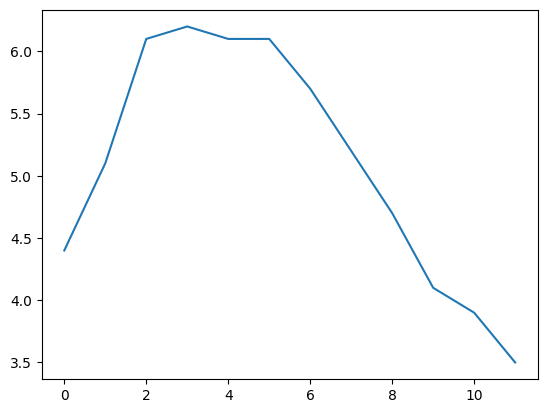

In [ ]:
import matplotlib.pyplot as plt
temperatures = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9, 3.5]
s7 = pd.Series(temperatures, name='Temperatures')
s7.plot()
plt.show()

Існує *багато* різних опцій для побудови графіків даних. Щоб подивитись, які типи графіків доступні в pandas, можна перейти до секції [Візуалізація](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) в офіційній документації.

# Керування часом (handling time)

Багато наборів даних (datasets) мають часові мітки (timestamps), і pandas чудово підходить для маніпуляції такими даними:
* він може репрезентувати періоди (як от 2016Q3) та частоту (як от "monthly"),
* він може конвертувати періоди на фактичні часові мітки та навпаки,
* він може повторно зібрати дані та агрегувати значення як заманеться,
* а також може оперувати часовими зонами.

## Часовий діапазон

Почнімо зі створення часового ряду використовуючи `pd.date_range()`. Він повертає `DatetimeIndex`, який містить одну дату за годину (datetime per hour) протягом 12 годин, починаючи з 1 вересня 2024 року о 17:30.

In [ ]:
dates = pd.date_range('2024/09/01 5:30pm', periods=12, freq='h')
dates

DatetimeIndex(['2024-09-01 17:30:00', '2024-09-01 18:30:00',
               '2024-09-01 19:30:00', '2024-09-01 20:30:00',
               '2024-09-01 21:30:00', '2024-09-01 22:30:00',
               '2024-09-01 23:30:00', '2024-09-02 00:30:00',
               '2024-09-02 01:30:00', '2024-09-02 02:30:00',
               '2024-09-02 03:30:00', '2024-09-02 04:30:00'],
              dtype='datetime64[ns]', freq='H')

Цей `DatetimeIndex` можна використати як індекс в `Series`:

In [ ]:
temp_series = pd.Series(temperatures, dates)
temp_series

,0
2024-09-01 17:30:00,4.4
2024-09-01 18:30:00,5.1
2024-09-01 19:30:00,6.1
2024-09-01 20:30:00,6.2
2024-09-01 21:30:00,6.1
2024-09-01 22:30:00,6.1
2024-09-01 23:30:00,5.7
2024-09-02 00:30:00,5.2
2024-09-02 01:30:00,4.7
2024-09-02 02:30:00,4.1


Тепер можна побудувати графік цього ряду:

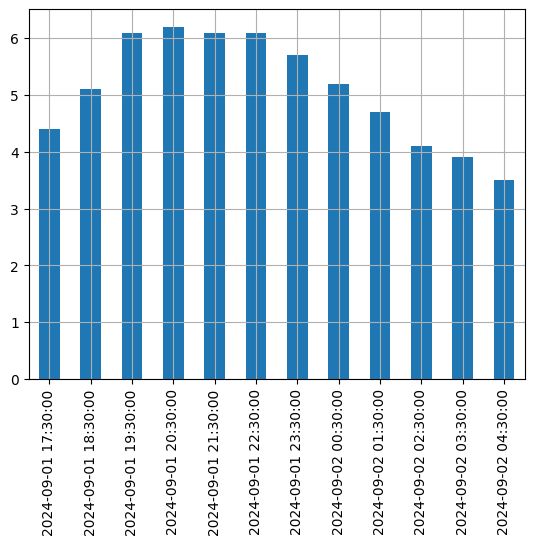

In [ ]:
temp_series.plot(kind='bar')

plt.grid(True)
plt.show()

## Повторна вибірка (resampling)

Pandas дозволяє дуже легко зробити повторну вибірку часового ряду. Можна просто викликати метод `resample()` та уточнити нову частоту:

In [ ]:
temp_series_freq_2h = temp_series.resample('2h')
temp_series_freq_2h

Операція повторної вибірки насправді є відкладеною (deferred) операцією, тому ми отримали не об'єкт `Series`, а об'єкт `DatetimeIndexResampler`. Щоб насправді виконати операцію повторної вибірки, можна просто викликати метод `mean()`. Pandas порахує середнє значення кожної пари послідовних годин (consecutive hours).

In [ ]:
temp_series_freq_2h = temp_series_freq_2h.mean()

Тепер можна побудувати графік результату:

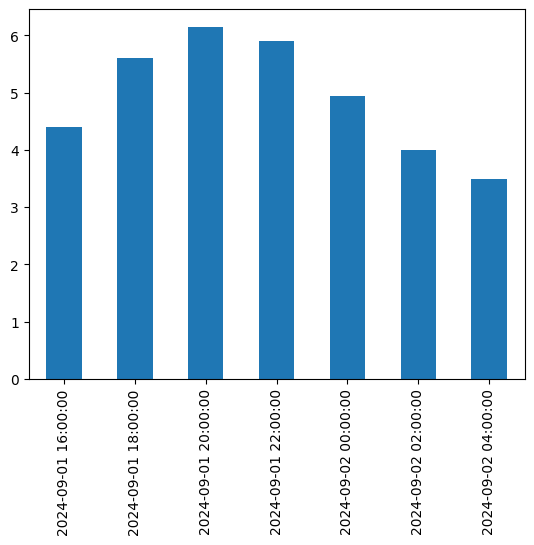

In [ ]:
temp_series_freq_2h.plot(kind='bar')
plt.show()

Варто зазначити, що значення було автоматично агреговано (aggregated) в двогодинні періоди. Якщо ми подивимось на період 6-8pm, наприклад, ми мали значення `5.1` о 6:30pm та `6.1` о 7:30pm. Після повторної вибірки, ми маємо лише одне значення 5.6, яке є середнім значенням між `5.1` та `6.1`. Замість обрахування середнього значення, ми могли б використати будь-яку іншу функцію агрегування. Наприклад, ми можемо вирішити зберегти мінімальне значення кожного періоду:

In [ ]:
temp_series_freq_2h = temp_series.resample('2h').min()
temp_series_freq_2h

,0
2024-09-01 16:00:00,4.4
2024-09-01 18:00:00,5.1
2024-09-01 20:00:00,6.1
2024-09-01 22:00:00,5.7
2024-09-02 00:00:00,4.7
2024-09-02 02:00:00,3.9
2024-09-02 04:00:00,3.5


Або, так само, можна використати метод `apply()`:

In [ ]:
temp_series_freq_2h = temp_series.resample('2h').apply('min')
temp_series_freq_2h

,0
2024-09-01 16:00:00,4.4
2024-09-01 18:00:00,5.1
2024-09-01 20:00:00,6.1
2024-09-01 22:00:00,5.7
2024-09-02 00:00:00,4.7
2024-09-02 02:00:00,3.9
2024-09-02 04:00:00,3.5


## Підвищення вибірки та інтерполяція (upsampling and interpolation)

То був приклад зменшення вибірки (downsampling). Ми можемо також і підвищити вибірку (upsample). Наприклад, підвищити частоту, але це створить дірки в наших даних:

In [ ]:
temp_series_freq_15min = temp_series.resample('15min').mean()
temp_series_freq_15min.head(n=10) # `head` показує перші n значень

,0
2024-09-01 17:30:00,4.4
2024-09-01 17:45:00,NaN
2024-09-01 18:00:00,NaN
2024-09-01 18:15:00,NaN
2024-09-01 18:30:00,5.1
2024-09-01 18:45:00,NaN
2024-09-01 19:00:00,NaN
2024-09-01 19:15:00,NaN
2024-09-01 19:30:00,6.1
2024-09-01 19:45:00,NaN


Одне вирішення - це заповнити пропуски за допомогою інтерполяції. Ми можемо просто викликати метод `interpolate()`. За замовчуванням використовується лінійна інтерполяція, але можна також обрати інший метод, як от кубічна інтерполяція:

In [ ]:
temp_series_freq_15min = temp_series.resample('15min').interpolate(method='cubic')
temp_series_freq_15min.head(n=10)

,0
2024-09-01 17:30:00,4.400000
2024-09-01 17:45:00,4.452911
2024-09-01 18:00:00,4.605113
2024-09-01 18:15:00,4.829758
2024-09-01 18:30:00,5.100000
2024-09-01 18:45:00,5.388992
2024-09-01 19:00:00,5.669887
2024-09-01 19:15:00,5.915839
2024-09-01 19:30:00,6.100000
2024-09-01 19:45:00,6.203621


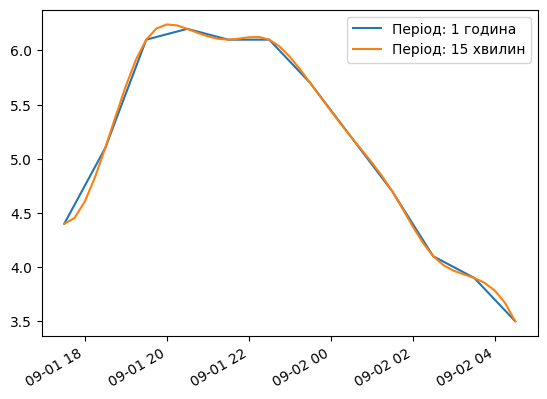

In [ ]:
temp_series.plot(label='Період: 1 година')
temp_series_freq_15min.plot(label='Період: 15 хвилин')
plt.legend()
plt.show()

## Часові зони (timezones)

За замовчуванням, datetimes *наївні (naive)*: вони не знають про часові зони, тому 2024-09-01 02:30 може значити 1 вересня о 2:30am в Парижі або Нью-Йорку. Ми можемо зробити так, що datetimes будуть знати про часові зони, просто викликавши метод `tz_localize()`.

In [ ]:
temp_series_ny = temp_series.tz_localize('America/New_York')
temp_series_ny

,0
2024-09-01 17:30:00-04:00,4.4
2024-09-01 18:30:00-04:00,5.1
2024-09-01 19:30:00-04:00,6.1
2024-09-01 20:30:00-04:00,6.2
2024-09-01 21:30:00-04:00,6.1
2024-09-01 22:30:00-04:00,6.1
2024-09-01 23:30:00-04:00,5.7
2024-09-02 00:30:00-04:00,5.2
2024-09-02 01:30:00-04:00,4.7
2024-09-02 02:30:00-04:00,4.1


Можна помітити, що `-04:00` з'явилось у всіх datetimes. Це означає, що всі ці datetimes посилаються на **UTC - 4 години**.

Можна конвертувати ці datetimes на час Парижу наступним чином:

In [ ]:
temp_series_paris = temp_series_ny.tz_convert('Europe/Paris')
temp_series_paris

,0
2024-09-01 23:30:00+02:00,4.4
2024-09-02 00:30:00+02:00,5.1
2024-09-02 01:30:00+02:00,6.1
2024-09-02 02:30:00+02:00,6.2
2024-09-02 03:30:00+02:00,6.1
2024-09-02 04:30:00+02:00,6.1
2024-09-02 05:30:00+02:00,5.7
2024-09-02 06:30:00+02:00,5.2
2024-09-02 07:30:00+02:00,4.7
2024-09-02 08:30:00+02:00,4.1


Використаємо приклад з датою, коли Франція переводить годинник:

In [ ]:
dates_2016 = pd.date_range('2016/10/29 5:30pm', periods=12, freq='h')
temp_series_2016 = pd.Series(temperatures, dates_2016)
temp_series_ny_2016 = temp_series_2016.tz_localize("America/New_York")
temp_series_paris_2016 = temp_series_ny_2016.tz_convert("Europe/Paris")
temp_series_paris_2016

,0
2016-10-29 23:30:00+02:00,4.4
2016-10-30 00:30:00+02:00,5.1
2016-10-30 01:30:00+02:00,6.1
2016-10-30 02:30:00+02:00,6.2
2016-10-30 02:30:00+01:00,6.1
2016-10-30 03:30:00+01:00,6.1
2016-10-30 04:30:00+01:00,5.7
2016-10-30 05:30:00+01:00,5.2
2016-10-30 06:30:00+01:00,4.7
2016-10-30 07:30:00+01:00,4.1


Тепер можна помітити, що доданок UTC змінюється з `+02:00` на `+01:00`. Це тому, що Франція змінює час на зимній о 03:00 саме цієї ночі (час переходить назад до 02:00). Через це 02:30 з'являється двічі! Можна повернутись до наївної репрезентації (якщо ви реєструєте деякі дані погодинно, використовуючи місцевий час, без збереження часового поясу, ви можете отримати щось на кшталт цього):

In [ ]:
temp_series_paris_2016_naive = temp_series_paris_2016.tz_localize(None)
temp_series_paris_2016_naive

,0
2016-10-29 23:30:00,4.4
2016-10-30 00:30:00,5.1
2016-10-30 01:30:00,6.1
2016-10-30 02:30:00,6.2
2016-10-30 02:30:00,6.1
2016-10-30 03:30:00,6.1
2016-10-30 04:30:00,5.7
2016-10-30 05:30:00,5.2
2016-10-30 06:30:00,4.7
2016-10-30 07:30:00,4.1


Тепер `02:30` став неоднозначним. Якщо ми спробуємо локалізувати ці ніївні datetimes то часової зони Парижу, то отримаємо помилку:

In [ ]:
try:
  temp_series_paris_2016_naive.tz_localize('Europe/Paris')
except Exception as e:
  print(type(e))
  print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from 2016-10-30 02:30:00, try using the 'ambiguous' argument


На щастя, використовуючи аргумент `ambiguous` ми можемо сказати Pandas зробити правильний висновок (infer) про літній час (DTS - Daylight Saving Time) на основі порядку неоднозначних міток часу (ambiguous timastamps):

In [ ]:
temp_series_paris_2016_naive.tz_localize('Europe/Paris', ambiguous='infer')

,0
2016-10-29 23:30:00+02:00,4.4
2016-10-30 00:30:00+02:00,5.1
2016-10-30 01:30:00+02:00,6.1
2016-10-30 02:30:00+02:00,6.2
2016-10-30 02:30:00+01:00,6.1
2016-10-30 03:30:00+01:00,6.1
2016-10-30 04:30:00+01:00,5.7
2016-10-30 05:30:00+01:00,5.2
2016-10-30 06:30:00+01:00,4.7
2016-10-30 07:30:00+01:00,4.1


## Періоди

Функція `pd.period_range()` повертає `PeriodIndex` замість `DatetimeIndex`. Наприклад, візьмемо всі квартали у 2023 та 2024:

In [ ]:
quarters = pd.period_range('2023Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2',
             '2024Q3', '2024Q4'],
            dtype='period[Q-DEC]')

Додавання числа `N` до `PeriodIndex` зміщує період на `N` $\times$ частота `PeriodIndex`:

In [ ]:
quarters + 3

PeriodIndex(['2023Q4', '2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1',
             '2025Q2', '2025Q3'],
            dtype='period[Q-DEC]')

Метод `asfreq()` дозволяє змінити частоту `PeriodIndex`. Всі періоди буде подовжено або скорочено відповідно. Наприклад, конвертуємо всі квартали до місячних періодів (зумування, zooming in):

In [ ]:
quarters.asfreq('M')

PeriodIndex(['2023-03', '2023-06', '2023-09', '2023-12', '2024-03', '2024-06',
             '2024-09', '2024-12'],
            dtype='period[M]')

За замовчуванням, `asfreq` масштабує в кінці кожного періоду. Ми можемо сказати йому збільшувати масштаб на початку кожного періоду:

In [ ]:
quarters.asfreq('M', how='start')

PeriodIndex(['2023-01', '2023-04', '2023-07', '2023-10', '2024-01', '2024-04',
             '2024-07', '2024-10'],
            dtype='period[M]')

Також можна зменшити масштаб:

In [ ]:
quarters.asfreq('Y')

PeriodIndex(['2023', '2023', '2023', '2023', '2024', '2024', '2024', '2024'], dtype='period[A-DEC]')

Звичайно ж можна зробити `Series` з `PeriodIndex`:

In [ ]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index=quarters)
quarterly_revenue

,0
2023Q1,300
2023Q2,320
2023Q3,290
2023Q4,390
2024Q1,320
2024Q2,360
2024Q3,310
2024Q4,410


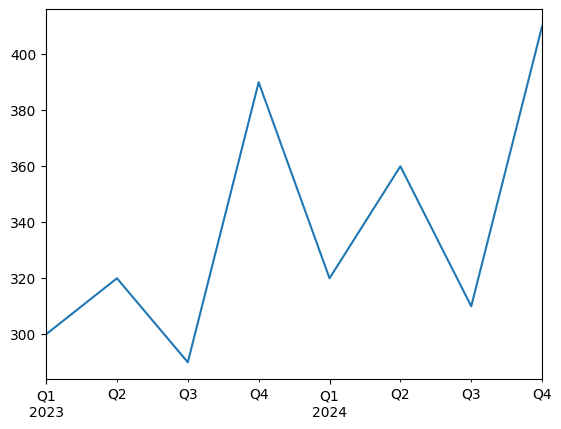

In [ ]:
quarterly_revenue.plot(kind='line')
plt.show()

Можна перетворити періоди в часові мітки (timestamps), викликавши `to_timestamp`. За замовчуванням, це дасть нам перший день кожного періоду, але встановивши `how` та `freq`, ми можемо отримати останню годину кожного періодну:

In [ ]:
last_hours = quarterly_revenue.to_timestamp(how='end', freq='h')
last_hours

,0
2023-03-31 23:59:59.999999999,300
2023-06-30 23:59:59.999999999,320
2023-09-30 23:59:59.999999999,290
2023-12-31 23:59:59.999999999,390
2024-03-31 23:59:59.999999999,320
2024-06-30 23:59:59.999999999,360
2024-09-30 23:59:59.999999999,310
2024-12-31 23:59:59.999999999,410


І назад в періоди, викликавши `to_period`:

In [ ]:
last_hours.to_period()

,0
2023Q1,300
2023Q2,320
2023Q3,290
2023Q4,390
2024Q1,320
2024Q2,360
2024Q3,310
2024Q4,410


Pandas також надає багато інших функцій, які відносяться до часу. Їх можна переглянути в [документації](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). Наприклад, так можна отримати останній робочий день кожного місяця в 2024, о 09:00:

In [ ]:
months_2024 = pd.period_range('2024', periods=12, freq='M')
one_day_after_last_days = months_2024.asfreq('D') + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("h") + 9

PeriodIndex(['2024-01-31 09:00', '2024-02-29 09:00', '2024-03-29 09:00',
             '2024-04-30 09:00', '2024-05-31 09:00', '2024-06-28 09:00',
             '2024-07-31 09:00', '2024-08-30 09:00', '2024-09-30 09:00',
             '2024-10-31 09:00', '2024-11-29 09:00', '2024-12-31 09:00'],
            dtype='period[H]')

# Об'єкти `DataFrame`

Об'єкти `DataFrame` репрезентують табличку (spreadsheet) зі значеннями комірок (cells), іменами колонок та індексами (index labels) рядків. Можна визначати вирази для обрахування колонок, базуючись на інших колонках, створювати зведені таблиці (pivot-tables), групувати рядки, будувати графіки тощо. Можна сприймати `DataFrame` як словник з `Series`.

## Створення `DataFrame`

`DataFrame` можна створити, надавши словник з об'єктів `Series`:

In [ ]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=['alice', 'bob', 'charles']),
    "birthyear": pd.Series([1984, 1985, 1992], index=['bob', 'alice', 'charles'], name='year'),
    "children": pd.Series([0, 3], index=['charles', 'bob']),
    "hobby": pd.Series(['Biking', 'Dancing'], index=['alice', 'bob']),
}

people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


Речі, на які варто звернути увагу:
* всі `Series` було автоматично вирівняно (aligned), базуючись на їхніх індексах,
* пропущені значення позначені як `NaN`,
* імена `Series` було проігноровано (ім'я `'year'` було пропущено, dropped),
* `DataFrame`и відображаються гарно в Jupyter notebook

Доступ до колонок можна отримати так, як цього можна було б очікувати. Вони повертаються як об'єкти `Series`:

In [ ]:
people['birthyear']

,birthyear
alice,1985
bob,1984
charles,1992


Отримати за раз можна одразу декілька колонок:

In [ ]:
people[['birthyear', 'hobby']]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


Якщо надати список колонок та/або мітки індексних рядків (index row labels) до конструктора `DataFrame`, він гарантуватиме, що ці колонки та/або рядки існуватимуть, в даному порядку, і жодні інші колонки/рядки не будуть існувати. Наприклад:

In [ ]:
d2 = pd.DataFrame(
    people_dict,
    columns=['birthyear', 'weight', 'height'],
    index=['bob', 'alice', 'eugene']
)
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Інший зручний спосіб створення `DataFrame` - це надати всі значення в конструктор як `ndarray`, або список списків (list of lists), а також вказати окремо імена колонок та index labels рядків:

In [ ]:
values = [
    [1985, np.nan, 'Biking', 68],
    [1984, 3, 'Dancing', 83],
    [1992, 0, np.nan, 112]
]
d3 = pd.DataFrame(
    values,
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=['alice', 'bob', 'charles']
)
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Щоб вказати пропущені значення, можна використати або `np.nan`, або масковані масиви (masked arrays) NumPy

In [8]:
masked_array = np.ma.asarray(values, dtype=object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
    masked_array,
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=['alice', 'bob', 'charles']
)
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Замість `ndarray` можна також надавати і об'єкт `DataFrame`:

In [9]:
d4 = pd.DataFrame(
    d3,
    columns=['hobby', 'children'],
    index=['alice', 'bob']
)
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


Також можливо створити `DataFrame` з словника (або списку) словників (або списків):

In [10]:
people = pd.DataFrame({
    'birthyear': {'alice': 1985, 'bob': 1984, 'charles': 1992},
    'hobby': {'alice': 'Biking', 'bob': 'Dancing'},
    'weight': {'alice': 68, 'bob': 83, 'charles': 112},
    'children': {'bob': 3, 'charles': 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Мульти-індексування (multi-indexing)

Якщо всі колонки - це кортежі (tuples) однакових розмірів, вони будуть прийняті як мульти-індекс (multi-index). Така сама ситуація і з index labels. Наприклад:

In [11]:
d5 = pd.DataFrame(
    {
        ('public', 'birthyear'):
          {('Paris', 'alice'): 1985, ('Paris', 'bob'): 1984, ('London', 'charles'): 1992},
        ('public', 'hobby'):
          {('Paris', 'alice'): 'Biking', ('Paris', 'bob'): 'Dancing'},
        ('private', 'weight'):
          {('Paris', 'alice'): 68, ('Paris', 'bob'): 83, ('London', 'charles'): 112},
        ('private', 'children'):
          {('Paris', 'alice'): np.nan, ('Paris', 'bob'): 3, ('London', 'charles'): 0},
    }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

Тепер дуже просто отримати `DataFrame`, який містить всі `'public'` колонки:

In [12]:
d5['public']

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [13]:
d5['public', 'hobby'] # те саме, що і d5['public']['hobby']

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object